In [1]:
import argparse
import json
import os

import numpy as np
import pytorch_lightning as L
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from transformers import (
    ConditionalDetrConfig,
    ConditionalDetrForObjectDetection,
    ConditionalDetrForSegmentation,
    DeformableDetrConfig,
    DeformableDetrForObjectDetection,
    DetrConfig,
    DetrForObjectDetection,
    DetrForSegmentation,
    DetrImageProcessor,
)

import modules
import utils

/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/home/feity/cryoem/checkpoints/deformable_detr_pretrain"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [3]:
if configs["model"]["name"] == "conditional_detr":
    if configs["model"]["task"] == "segmentation":
        config = ConditionalDetrConfig(
            use_pretrained_backbone=False, **configs["model"]["args"]
        )
        seg_model = ConditionalDetrForSegmentation(config)
        if len(configs["model"]["pretrained"]) > 0:
            model = ConditionalDetrForObjectDetection.from_pretrained(
                configs["model"]["pretrained"],
                ignore_mismatched_sizes=True,
                **configs["model"]["args"]
            )
            seg_model.conditional_detr.load_state_dict(model.state_dict())
        model = seg_model
    elif configs["model"]["task"] == "detection":
        if len(configs["model"]["pretrained"]) > 0:
            model = ConditionalDetrForObjectDetection.from_pretrained(
                configs["model"]["pretrained"],
                ignore_mismatched_sizes=True,
                **configs["model"]["args"]
            )
        else:
            config = ConditionalDetrConfig(
                use_pretrained_backbone=False, **configs["model"]["args"]
            )
            model = ConditionalDetrForObjectDetection(config)

elif configs["model"]["name"] == "deformable_detr":
    if len(configs["model"]["pretrained"]) > 0:
        model = DeformableDetrForObjectDetection.from_pretrained(
            configs["model"]["pretrained"],
            ignore_mismatched_sizes=True,
            **configs["model"]["args"]
        )
    else:
        config = DeformableDetrConfig(
            use_pretrained_backbone=False, **configs["model"]["args"]
        )
        model = DeformableDetrForObjectDetection(config)

elif configs["model"]["name"] == "detr":
    if configs["model"]["task"] == "segmentation":
        if len(configs["model"]["pretrained"]) > 0:
            model = DetrForSegmentation.from_pretrained(
                configs["model"]["pretrained"],
                ignore_mismatched_sizes=True,
                **configs["model"]["args"]
            )
        else:
            config = DetrConfig(
                use_pretrained_backbone=False, **configs["model"]["args"]
            )
            model = DetrForSegmentation(config)
    elif configs["model"]["task"] == "detection":
        if len(configs["model"]["pretrained"]) > 0:
            model = DetrForObjectDetection.from_pretrained(
                configs["model"]["pretrained"],
                ignore_mismatched_sizes=True,
                **configs["model"]["args"]
            )
        else:
            config = DetrConfig(
                use_pretrained_backbone=False, **configs["model"]["args"]
            )
            model = DetrForObjectDetection(config)
else:
    raise NotImplementedError

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

In [5]:
model = modules.Detr(
        lr=configs["training"]["lr"],
        lr_backbone=configs["training"]["lr_backbone"],
        weight_decay=configs["training"]["weight_decay"],
        model=model,
    )

In [7]:
ckpt = torch.load(os.path.join(path, "last.ckpt"))
model.load_state_dict(ckpt["state_dict"])

/tmp/ipykernel_278559/624496722.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(path, "last.ckpt"))


<All keys matched successfully>

In [8]:
torch.save(model.model.state_dict(), os.path.join(path, "model.pth"))

In [1]:
import argparse
import json
import os

import numpy as np
import pytorch_lightning as L
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from transformers import (
    ConditionalDetrConfig,
    ConditionalDetrForObjectDetection,
    ConditionalDetrForSegmentation,
    DeformableDetrConfig,
    DeformableDetrForObjectDetection,
    DetrConfig,
    DetrForObjectDetection,
    DetrForSegmentation,
    DetrImageProcessor,
)
import modules
import utils

/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/home/feity/cryoem/checkpoints/deformable_train"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [12]:
if configs["data"]["transform"] == "default":
    t = utils.getDefaultTransform()
else:
    t = utils.getConstantTransform()

In [13]:
train_sets = {}
for i in configs["data"]["filter_class"]:
    train_sets[i] = modules.CocoDetection(
        configs["data"]["image_path"],
        configs["data"]["annotation_path_train"],
        is_npy=configs["data"]["is_npy"],
        transform=t,
        require_mask=configs["data"]["require_mask"][i],
        filter_class=configs["data"]["filter_class"][i],
        single_class=configs["data"]["single_class"][i],
        mark=i,
    )
val_sets = {}
for i in configs["data"]["filter_class"]:
    val_sets[i] = modules.CocoDetection(
        configs["data"]["image_path"],
        configs["data"]["annotation_path_val"],
        is_npy=configs["data"]["is_npy"],
        transform=utils.getConstantTransform(),
        require_mask=configs["data"]["require_mask"][i],
        filter_class=configs["data"]["filter_class"][i],
        single_class=configs["data"]["single_class"][i],
        mark=i,
    )

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [14]:
ds = modules.EMDataModule(
        train_sets,
        val_sets,
        configs["training"]["train_batch_size"],
        configs["training"]["val_batch_size"],
    )


In [15]:
d = ds.train_dataloader()

In [19]:
for i, j in enumerate(d[1]):
    print(j)
    break


{'pixel_values': tensor([[[[0.5881, 0.6217, 0.6295,  ..., 0.0000, 0.0000, 0.0000],
          [0.6093, 0.6250, 0.6303,  ..., 0.0000, 0.0000, 0.0000],
          [0.6388, 0.6335, 0.6370,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.6120, 0.6620, 0.6210,  ..., 0.0000, 0.0000, 0.0000],
          [0.6380, 0.6364, 0.6223,  ..., 0.0000, 0.0000, 0.0000],
          [0.6515, 0.6273, 0.6154,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.5732, 0.6074, 0.6211,  ..., 0.0000, 0.0000, 0.0000],
          [0.5706, 0.6052, 0.6266,  ..., 0.0000, 0.0000, 0.0000],
          [0.6095, 0.6277

In [4]:
import pickle 
with open("/home/feity/cryoem/dataset/npy_annotations.pkl", "rb") as f:
    a = pickle.load(f)
for i in range(len(a["images"])):
    fn = a["images"][i]["file_name"]
    filename = fn.split(".")[0]
    filename = filename.split("_")[-1]
    filename = float(filename)
    a["images"][i]["zpos"] = filename
with open("/home/feity/cryoem/dataset/npy_annotations_fn.pkl", "wb") as f:
    pickle.dump(a, f)

In [3]:
import torchvision
torchvision.disable_beta_transforms_warning()
from torchvision.tv_tensors import BoundingBoxes, Mask
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.v2  as transforms
from functools import partial
import numpy as np
import sys 
import os
sys.path.append("/home/tyfei/cyroem")
import utils
import pycocotools
import json
import torch
import matplotlib.pyplot as plt
import pandas as pd
from transformers import DetrForObjectDetection, DetrImageProcessor, DetrForSegmentation
import modules

In [4]:
dataset = modules.CocoTraverse("/home/feity/cryoem/dataset/Mean10", 
                        "/home/feity/cryoem/dataset/npy_annotations_fn.pkl",
                        is_npy=True, filter_class={"other":[1,2,4,5,6,7,8,9,10,11,12,13], "ribo":[3]}, single_class={"other":False, "ribo":True}, add_classname=True, maxsize=800) 


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
for i in dataset:
    print(i["labels"]["num"], i["labels"]["pos"])

3 0.0
3 10.0
3 20.0
3 30.0
3 40.0
2 50.0
3 60.0
3 70.0
3 80.0
2 90.0
2 100.0
6 110.0
15 120.0
33 130.0
55 140.0
68 150.0
85 160.0
103 170.0
123 180.0
137 190.0
135 200.0
134 210.0
139 220.0
149 230.0
156 240.0
175 250.0
168 260.0
152 270.0
144 280.0
118 290.0
95 300.0
77 310.0
61 320.0
52 330.0
58 340.0
56 350.0
38 360.0
25 370.0
8 380.0
4 390.0


/home/feity/cryoem/utils.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  annotated_tensor = torch.tensor(annotated_tensor, dtype=torch.uint8)
/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/torchvision/utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


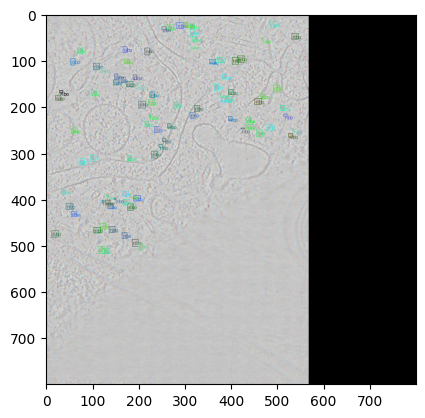

In [6]:
data = dataset[20]
utils.drawannotation(data["pixel_values"], data["labels"]["ribo"])

In [7]:
data["labels"]["other"]

{'bboxes': BoundingBoxes([[538, 410, 563, 520],
                [ 16, 171, 345, 383],
                [138,  42, 294, 323],
                [315, 236, 484, 358],
                [ 79, 193, 182, 305],
                [395,  97, 499, 217],
                [ 49,  11, 160, 169],
                [  3,  99,  21, 180],
                [  0, 313, 129, 348],
                [503,  65, 568, 187],
                [ 39, 214,  61, 286],
                [215,   5, 341, 103],
                [551, 420, 565, 459],
                [ 56, 230, 113, 290],
                [213, 398, 214, 401],
                [  0, 522, 119, 613],
                [  0,   0, 351, 387],
                [ 87,  15, 166, 100],
                [393,  61, 568, 218],
                [ 47, 116,  97, 166],
                [316, 237, 482, 358],
                [225, 392, 325, 466],
                [475,  55, 491,  96],
                [113,  86, 146, 109],
                [494, 140, 503, 170],
                [464, 168, 480, 185],
  

In [8]:
data["labels"]

{'pos': 200.0,
 'other': {'bboxes': BoundingBoxes([[538, 410, 563, 520],
                 [ 16, 171, 345, 383],
                 [138,  42, 294, 323],
                 [315, 236, 484, 358],
                 [ 79, 193, 182, 305],
                 [395,  97, 499, 217],
                 [ 49,  11, 160, 169],
                 [  3,  99,  21, 180],
                 [  0, 313, 129, 348],
                 [503,  65, 568, 187],
                 [ 39, 214,  61, 286],
                 [215,   5, 341, 103],
                 [551, 420, 565, 459],
                 [ 56, 230, 113, 290],
                 [213, 398, 214, 401],
                 [  0, 522, 119, 613],
                 [  0,   0, 351, 387],
                 [ 87,  15, 166, 100],
                 [393,  61, 568, 218],
                 [ 47, 116,  97, 166],
                 [316, 237, 482, 358],
                 [225, 392, 325, 466],
                 [475,  55, 491,  96],
                 [113,  86, 146, 109],
                 [494, 140, 50

In [9]:
path = "/home/feity/cryoem/checkpoints/deformable_train3"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [10]:
model = utils.getModel(configs)

Some weights of the model checkpoint at SenseTime/deformable-detr were not used when initializing DeformableDetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeformableDetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeformableDetrForObjectDetection wer

In [11]:
ckpt = torch.load(os.path.join(path, "last.ckpt")) 
model.load_state_dict(ckpt["state_dict"])

/tmp/ipykernel_3677/3890675510.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(path, "last.ckpt"))


<All keys matched successfully>

In [12]:
from transformers.models.deformable_detr.modeling_deformable_detr import DeformableDetrHungarianMatcher 
matcher = DeformableDetrHungarianMatcher(1.0, 5.0, 2.0) 
matcher

def processSingle(model, label, data, target_size, model_names, thres, has_none, single=True):
    ret = [] 
    l = []
    output = model(pixel_values=data["pixel_values"].unsqueeze(0).float(), pixel_mask=data["pixel_mask"].unsqueeze(0).float())
    for idx, i in enumerate(model_names):
        _output = output[i]
        logits = _output["logits"].squeeze(0)
        pred_boxes = _output["pred_boxes"].squeeze(0)
        if has_none:
            prob = torch.softmax(logits) 
            prob = prob[:, :-1]
        else:
            prob = torch.sigmoid(logits)
        v, pos = torch.max(prob, dim=1)
            
        if i in label and len(label[i]["class_labels"]) > 0:
            o = {}
            o["pred_boxes"] = pred_boxes.unsqueeze(0)
            o["logits"] = logits.unsqueeze(0)
            match_res = matcher(o, [label[i]])
            match_res = match_res[0]
            reserve = v>thres 
            r = torch.zeros_like(reserve, dtype=torch.bool)
            r[match_res[0]] = True
            reserve = reserve | r 
        else:
            reserve = v>thres
        
        v, pos = torch.max(prob, dim=1) 
        logits = logits[reserve] 
        pred_boxes = pred_boxes[reserve] 
        embed = _output["last_hidden_state"].squeeze(0)
        embed = embed[reserve]
        if single:
            model_idx = torch.zeros((pred_boxes.shape[0], 1))
            model_idx[:, 0] = idx 
        else:
            model_idx = torch.zeros((pred_boxes.shape[0], len(model_names)))
            model_idx[:, idx] = 1.0 
            
        pos = torch.zeros((pred_boxes.shape[0], 5))
        pos[:, 0] = label["pos"]
        if "zposmax" in label:
            pos[:, 0] /= label["zposmax"] 
        else:
            pos[:, 0] /= 500 
        pos[:, 1] = pred_boxes[:, 0] * (label["size"][0]/target_size[0]) 
        pos[:, 2] = pred_boxes[:, 1] * (label["size"][1]/target_size[1])
        pos[:, 3] = pred_boxes[:, 2] * (label["size"][0]/target_size[0])
        pos[:, 4] = pred_boxes[:, 3] * (label["size"][1]/target_size[1])
        input = torch.concat([model_idx, pos, logits, embed], dim=1)
        ret.append(input)
        if i in label:
            targets = torch.zeros((pred_boxes.shape[0]), dtype=torch.long)
            if len(label[i]["class_labels"]) > 0:
                o = {}
                o["pred_boxes"] = pred_boxes.unsqueeze(0)
                o["logits"] = logits.unsqueeze(0)
                # print(o, label[i])
                match_res = matcher(o, [label[i]]) 
                match_res = match_res[0]
                target = label[i]["class_labels"] 
                target = target[match_res[1]]
                # print(targets, target)
                targets[match_res[0]] = target 
            l.append(targets)
        else:
            l.append(None)
            
    return ret, l
        
def buildStage2(model, dataset, target_size, thres, model_names=["other", "ribo"], has_none=False, single=True):
    ret = [] 
    l = [] 
    for i in range(len(dataset)):
        print(i)
        data = dataset[i]
        label = data["labels"]
        _ret, _l = processSingle(model, label, data, target_size, model_names, thres, has_none, single)
        ret.extend(_ret)
        l.extend(_l)
    return ret, l

In [20]:
with torch.no_grad():
    inputs, labels = buildStage2(model, dataset, (800, 800), 0.05, model_names=["other", "ribo"], has_none=False, single=True)

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [38]:
X = torch.cat(inputs, dim=0)
y = torch.cat(labels, dim=0)
X.shape

torch.Size([9252, 276])

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
def get_neighbors(X, z=500.0, x=500.0, y=500.0, radius=30):
    t = X[:, 1:4]
    t = t.numpy()
    t[:, 0] *= z
    t[:, 1] *= x
    t[:, 2] *= y 
    radius_neighbors = NearestNeighbors(radius=radius)
    radius_neighbors.fit(t)
    neighbors = radius_neighbors.radius_neighbors(t, return_distance=False)
    return neighbors
neighbors = get_neighbors(X)


In [36]:
source = [] 
dest = [] 
for i, j in enumerate(neighbors):
    for k in j:
        source.append(i)
        dest.append(k) 
edges = torch.tensor([source, dest], dtype=torch.long)
edges

tensor([[   0,    0,    0,  ..., 9251, 9251, 9251],
        [  24,   21,    4,  ..., 9242, 9115, 9208]])

In [40]:
from torch_geometric.data import Data 
t = Data(x=X, edge_index=edges, y=y)
# t.train_mask
torch.save(t, "/mnt/panbz/lab/transforemer_model/pretrain_data/dataset/stage2dataset/TS_031.pth")

In [ ]:
THRES=0.1
datas = []
for i in range(len(dataset)):
    data = dataset[i]
    size = data["labels"]["size"]
    output = model(pixel_values=data["pixel_values"].unsqueeze(0).float(), pixel_mask=data["pixel_mask"].unsqueeze(0).float())
    for j in ["ribo", "other"]:
        results = utils.postSegmentationTreatment(output[j], 0.00, target_sizes, mask_threshold=None)
        result = results[0]
        datas.append({"pixel_values":data["pixel_values"], "labels":data["labels"], "result":result})

tensor([-6.2589, -0.8516, -6.3564, -1.9572, -6.2141, -6.2538, -6.1188, -6.2807,
        -6.2625, -6.3060, -6.3387, -6.2274, -6.3543, -6.2882],
       grad_fn=<SelectBackward0>)

In [17]:
data["labels"]["other"]

{'bboxes': BoundingBoxes([[538, 410, 563, 520],
                [ 16, 171, 345, 383],
                [138,  42, 294, 323],
                [315, 236, 484, 358],
                [ 79, 193, 182, 305],
                [395,  97, 499, 217],
                [ 49,  11, 160, 169],
                [  3,  99,  21, 180],
                [  0, 313, 129, 348],
                [503,  65, 568, 187],
                [ 39, 214,  61, 286],
                [215,   5, 341, 103],
                [551, 420, 565, 459],
                [ 56, 230, 113, 290],
                [213, 398, 214, 401],
                [  0, 522, 119, 613],
                [  0,   0, 351, 387],
                [ 87,  15, 166, 100],
                [393,  61, 568, 218],
                [ 47, 116,  97, 166],
                [316, 237, 482, 358],
                [225, 392, 325, 466],
                [475,  55, 491,  96],
                [113,  86, 146, 109],
                [494, 140, 503, 170],
                [464, 168, 480, 185],
  

(array([13., 72., 28., 16., 13., 27., 35., 45., 46.,  5.]),
 array([-4.07932568, -3.57321596, -3.06710625, -2.56099653, -2.05488706,
        -1.54877734, -1.04266763, -0.53655791, -0.03044825,  0.47566143,
         0.98177111]),
 <BarContainer object of 10 artists>)

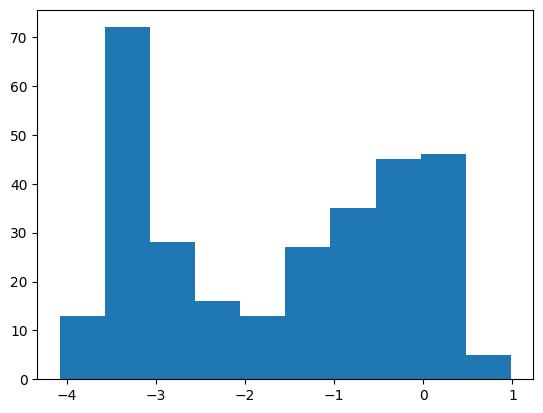

In [47]:
t = output["ribo"].logits.detach().cpu().numpy()
plt.hist(t[0, :, 3])

In [25]:
matcher_res = matcher(o, [data["labels"]["ribo"]])
matcher_res

[(tensor([  6,  18,  25,  30,  38,  39,  44,  45,  49,  53,  59,  61,  62,  64,
           69,  79,  80,  85,  96,  97,  98, 106, 107, 108, 117, 124, 129, 132,
          136, 139, 141, 144, 146, 147, 148, 149, 152, 153, 159, 163, 164, 167,
          170, 171, 172, 173, 174, 175, 177, 178, 179, 181, 185, 186, 188, 190,
          191, 197, 201, 203, 207, 209, 211, 224, 226, 228, 229, 231, 241, 244,
          249, 253, 259, 262, 263, 266, 268, 269, 270, 271, 276, 277, 280, 289,
          290, 291, 292, 297, 298]),
  tensor([39,  4, 25, 12, 34, 45, 32,  5, 78, 69, 63,  6, 54, 37, 62, 28, 79, 42,
          27, 21, 30, 57, 36, 75, 66, 15, 58, 22,  8, 33, 10, 59, 83, 38, 73, 76,
           0, 82, 68,  9, 72, 81, 65, 40, 18, 23, 48, 44, 52,  7, 17, 26, 11, 64,
          60, 86, 35, 50, 71, 80, 70, 85, 41,  2, 49,  3, 16, 29, 43, 13, 56, 87,
          61, 55, 46, 24, 14, 31, 84, 77, 20, 19, 88, 53, 74, 67, 47, 51,  1]))]

In [48]:

import torch  
def _get_source_permutation_idx(indices):
    # permute predictions following indices
    batch_idx = torch.cat([torch.full_like(source, i) for i, (source, _) in enumerate(indices)])
    source_idx = torch.cat([source for (source, _) in indices])
    return batch_idx, source_idx

source_logits = output["ribo"]["logits"]

idx = _get_source_permutation_idx(matcher_res)

target_classes_o = torch.cat([t["class_labels"][J] for t, (_, J) in zip([data["labels"]["ribo"]], matcher_res)])
target_classes = torch.full(
    source_logits.shape[:2], 14, dtype=torch.int64, device=source_logits.device
)
target_classes[idx] = target_classes_o

target_classes_onehot = torch.zeros(
    [source_logits.shape[0], source_logits.shape[1], source_logits.shape[2] + 1],
    dtype=source_logits.dtype,
    layout=source_logits.layout,
    device=source_logits.device,
)
target_classes_onehot.scatter_(2, target_classes.unsqueeze(-1), 1)

# target_classes_onehot = target_classes_onehot[:, :, :-1]

tensor([[[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]])

In [50]:
target_classes_onehot[0, 3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [18]:
output["other"]["pred_boxes"]

tensor([[[0.8507, 0.1947, 0.2551, 0.2836],
         [0.3755, 0.6644, 0.1082, 0.0900],
         [0.6263, 0.9077, 0.0764, 0.0643],
         ...,
         [0.6295, 0.1074, 0.0788, 0.1043],
         [0.6040, 0.1623, 0.1848, 0.1706],
         [0.1316, 0.8459, 0.2103, 0.2738]]], grad_fn=<SelectBackward0>)

In [60]:
o["logits"][0,37]

tensor([-1.6475, -4.0665, -4.1772, -3.8353, -4.2223, -4.1959, -4.1348, -4.2492,
        -4.2016, -4.2136, -4.2089, -4.1980, -4.1453, -4.2089],
       grad_fn=<SelectBackward0>)

In [50]:
data["labels"]["other"]

{'bboxes': BoundingBoxes([[538, 410, 563, 520],
                [ 16, 171, 345, 383],
                [138,  42, 294, 323],
                [315, 236, 484, 358],
                [ 79, 193, 182, 305],
                [395,  97, 499, 217],
                [ 49,  11, 160, 169],
                [  3,  99,  21, 180],
                [  0, 313, 129, 348],
                [503,  65, 568, 187],
                [ 39, 214,  61, 286],
                [215,   5, 341, 103],
                [551, 420, 565, 459],
                [ 56, 230, 113, 290],
                [213, 398, 214, 401],
                [  0, 522, 119, 613],
                [  0,   0, 351, 387],
                [ 87,  15, 166, 100],
                [393,  61, 568, 218],
                [ 47, 116,  97, 166],
                [316, 237, 482, 358],
                [225, 392, 325, 466],
                [475,  55, 491,  96],
                [113,  86, 146, 109],
                [494, 140, 503, 170],
                [464, 168, 480, 185],
  

In [52]:
matcher_res

[(tensor([  9,  18,  19,  22,  25,  30,  37,  38,  44,  45,  46,  56,  59,  61,
           64,  69,  74,  78,  79,  80,  81,  82,  85,  91,  96,  97,  98, 106,
          107, 108, 117, 124, 129, 132, 136, 141, 142, 144, 146, 147, 152, 159,
          164, 167, 170, 171, 172, 173, 174, 175, 178, 179, 181, 183, 185, 188,
          190, 191, 197, 201, 203, 207, 209, 223, 224, 226, 229, 231, 232, 233,
          235, 241, 246, 249, 253, 257, 259, 262, 266, 268, 269, 270, 276, 277,
          280, 287, 289, 290, 292]),
  tensor([77,  4, 38, 33, 25, 27, 11, 34, 32, 72, 46, 67, 63,  6, 41, 62, 69, 30,
          28, 79,  8, 13, 42, 15,  3, 21, 76, 50, 36, 75, 66, 29, 58, 22,  1, 10,
          37, 59, 83, 54,  0, 68, 19, 81, 65, 40, 18, 23, 48, 44,  7, 49, 26, 52,
          39, 60, 85, 35, 57, 87, 80, 70, 86, 12,  2, 82, 16, 88, 17,  9, 51, 43,
          45, 56,  5, 20, 61, 55, 24, 14, 31, 84, 78, 47, 73, 64, 53, 74, 71]))]

In [22]:
data["labels"]["other"]

{'bboxes': BoundingBoxes([[538, 410, 563, 520],
                [ 16, 171, 345, 383],
                [138,  42, 294, 323],
                [315, 236, 484, 358],
                [ 79, 193, 182, 305],
                [395,  97, 499, 217],
                [ 49,  11, 160, 169],
                [  3,  99,  21, 180],
                [  0, 313, 129, 348],
                [503,  65, 568, 187],
                [ 39, 214,  61, 286],
                [215,   5, 341, 103],
                [551, 420, 565, 459],
                [ 56, 230, 113, 290],
                [213, 398, 214, 401],
                [  0, 522, 119, 613],
                [  0,   0, 351, 387],
                [ 87,  15, 166, 100],
                [393,  61, 568, 218],
                [ 47, 116,  97, 166],
                [316, 237, 482, 358],
                [225, 392, 325, 466],
                [475,  55, 491,  96],
                [113,  86, 146, 109],
                [494, 140, 503, 170],
                [464, 168, 480, 185],
  

In [ ]:
target_ids = torch.cat([v["class_labels"] for v in targets])